In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [166]:
df=pd.read_csv('housing.csv')
df.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY


In [167]:
df.dropna(inplace=True)

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [169]:
X=df.drop(['median_house_value'],axis=1)
Y=df['median_house_value']

In [170]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [171]:
train_df=X_train.join(Y_train)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

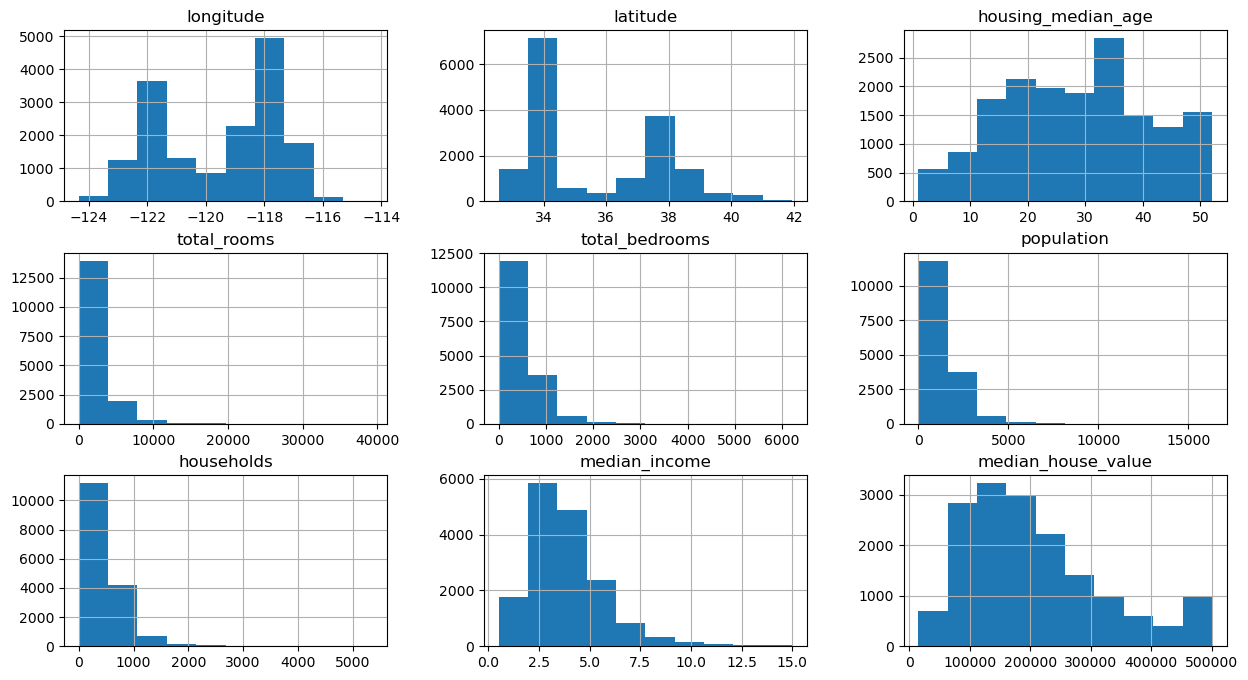

In [172]:
train_df.hist(figsize=(15,8))

<Axes: >

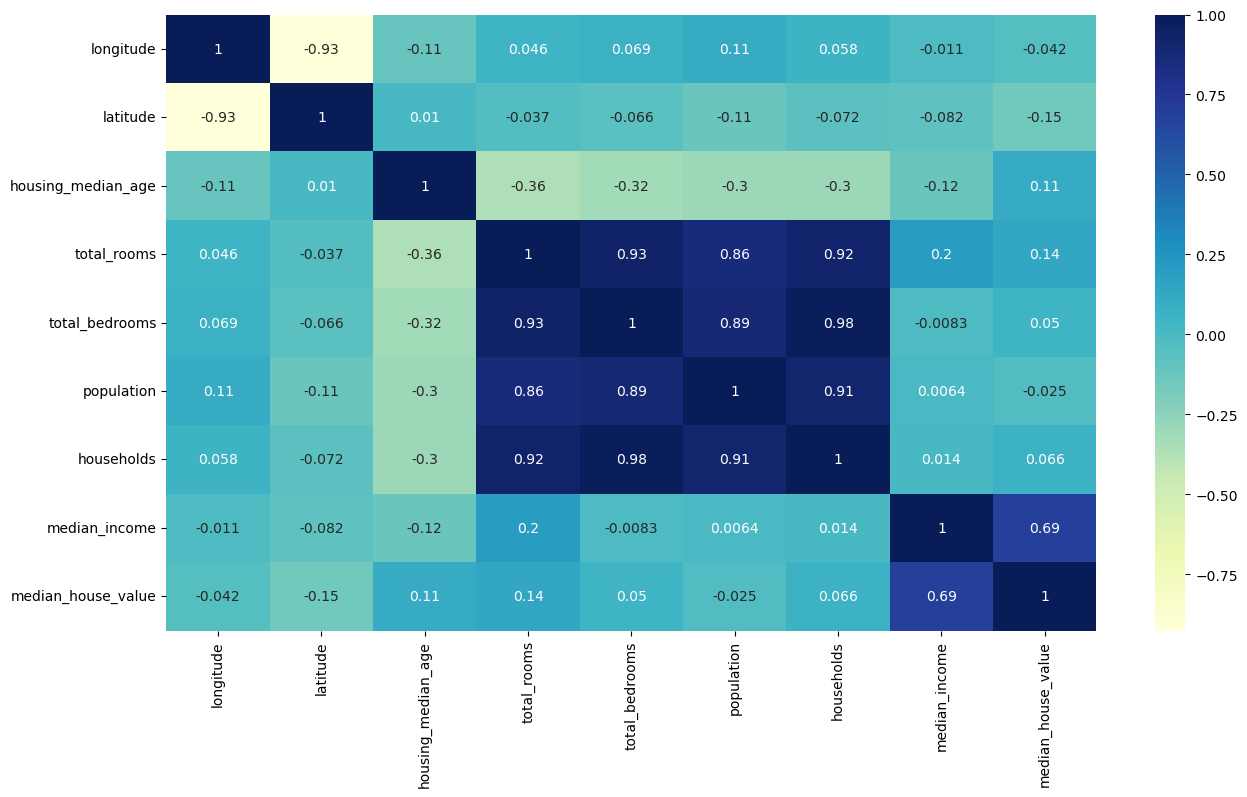

In [173]:
plt.figure(figsize=(15,8))
sns.heatmap(train_df.select_dtypes(include=['number']).corr(),annot=True,cmap='YlGnBu')

In [174]:
train_df['total_rooms']=np.log(train_df['total_rooms']+1)
train_df['total_bedrooms']=np.log(train_df['total_bedrooms']+1)
train_df['population']=np.log(train_df['population']+1)
train_df['households']=np.log(train_df['households']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

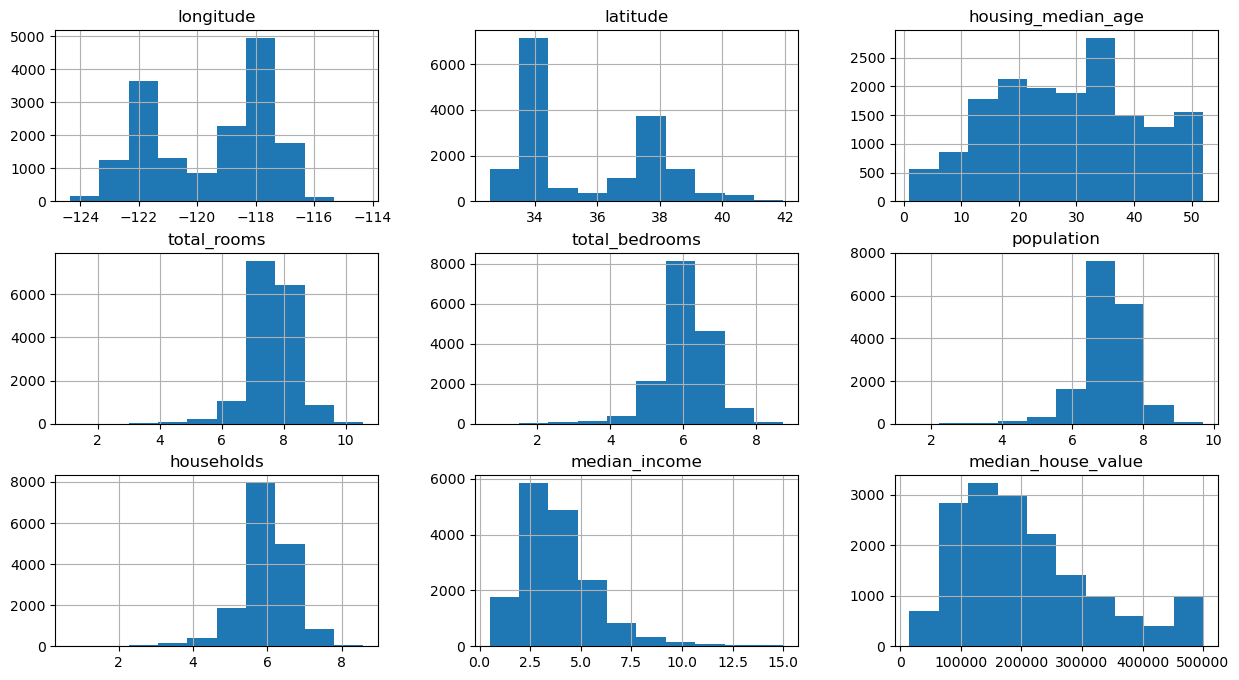

In [175]:
train_df.hist(figsize=(15,8))

In [176]:
train_df=train_df.join(pd.get_dummies(train_df.ocean_proximity)).drop(['ocean_proximity'],axis=1)

<Axes: >

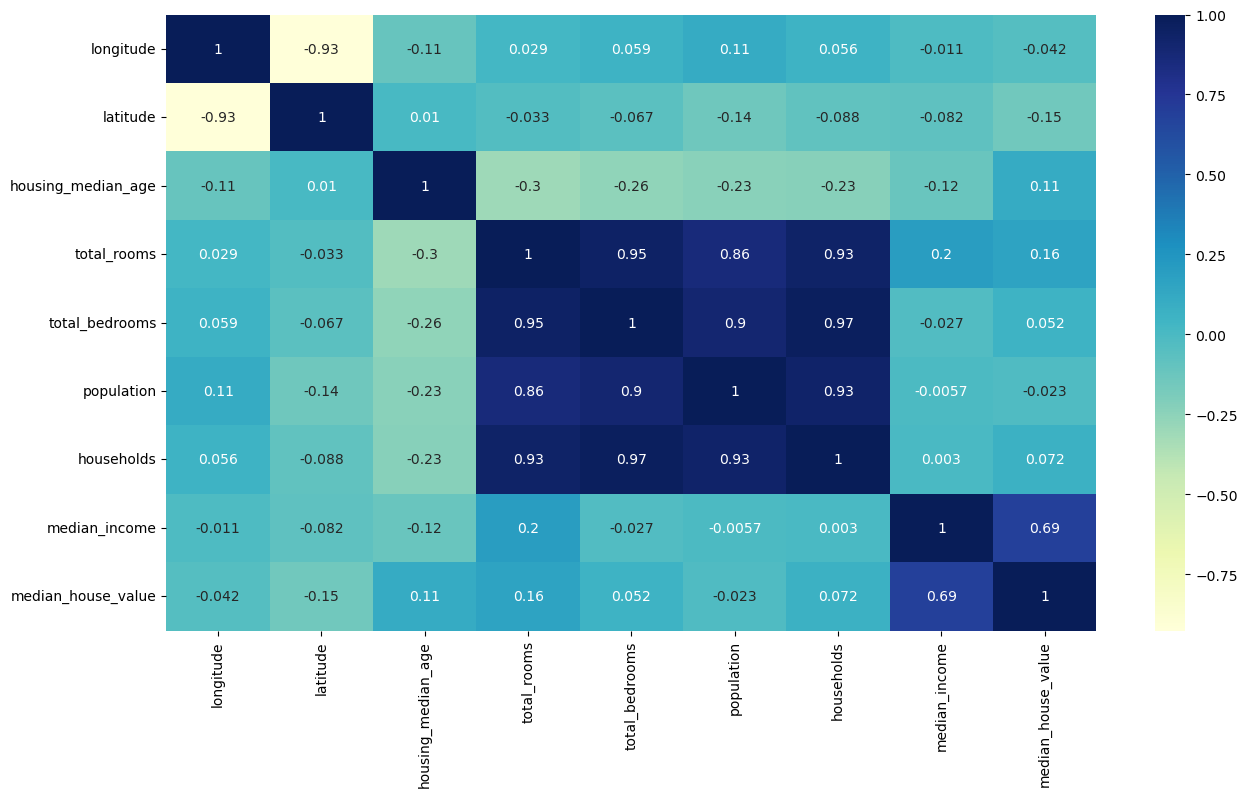

In [177]:
plt.figure(figsize=(15,8))
sns.heatmap(train_df.select_dtypes(include=['number']).corr(),annot=True,cmap='YlGnBu')

In [178]:
train_df['bedrooms_ratio']=train_df['total_bedrooms']/train_df['total_rooms']
train_df['household_rooms']=train_df['total_rooms']/train_df['households']

<Axes: >

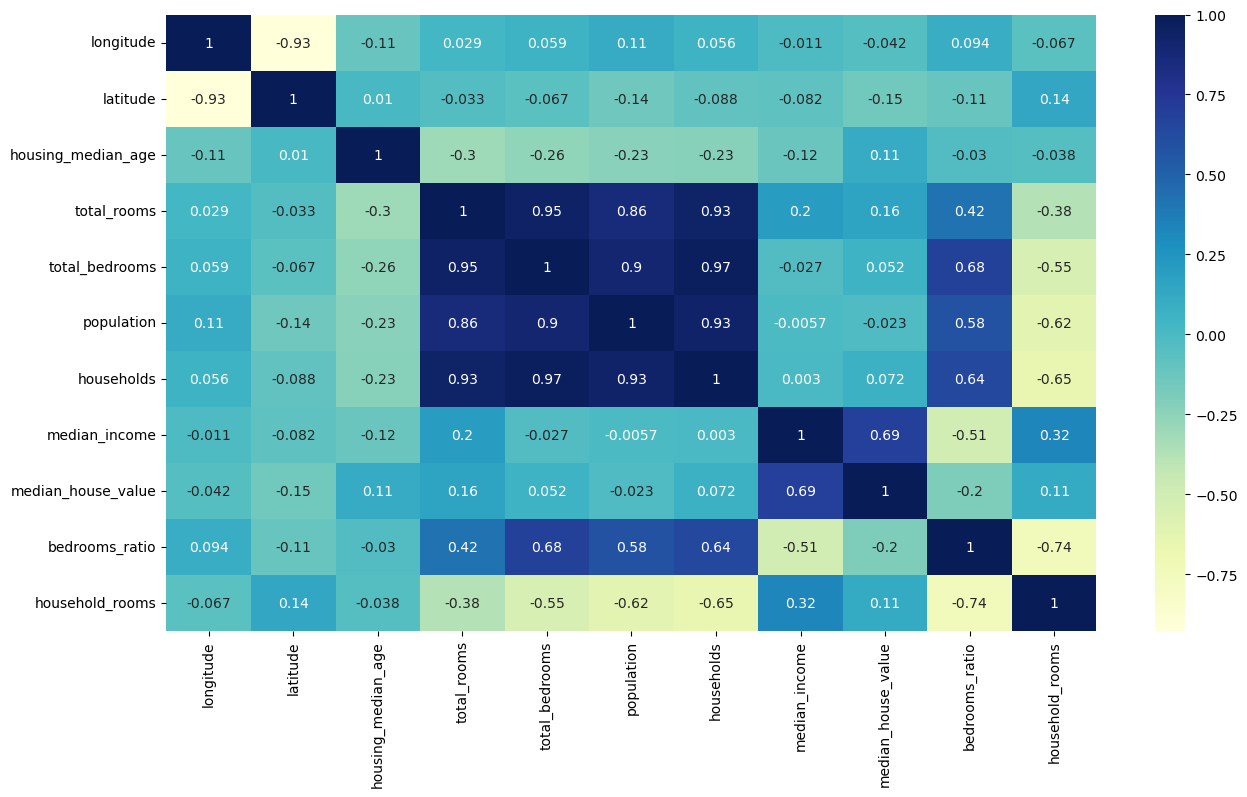

In [179]:
plt.figure(figsize=(15,8))
sns.heatmap(train_df.select_dtypes(include=['number']).corr(),annot=True,cmap='YlGnBu')

In [180]:
from sklearn.linear_model import LinearRegression
X_train,Y_train=train_df.drop(['median_house_value'],axis=1),train_df['median_house_value']
reg_model=LinearRegression()
reg_model.fit(X_train,Y_train)

LinearRegression()

In [181]:
test_df=X_test.join(Y_test)

test_df['total_rooms']=np.log(test_df['total_rooms']+1)
test_df['total_bedrooms']=np.log(test_df['total_bedrooms']+1)
test_df['population']=np.log(test_df['population']+1)
test_df['households']=np.log(test_df['households']+1)
test_df=test_df.join(pd.get_dummies(test_df.ocean_proximity)).drop(['ocean_proximity'],axis=1)
test_df['bedrooms_ratio']=test_df['total_bedrooms']/test_df['total_rooms']
test_df['household_rooms']=test_df['total_rooms']/test_df['households']

In [182]:
X_test,Y_test=test_df.drop(['median_house_value'],axis=1),test_df['median_house_value']

In [183]:
reg_model.score(X_test,Y_test)

0.6770659475534886

In [184]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(X_train,Y_train)

RandomForestRegressor()

In [185]:
model.score(X_test,Y_test)

0.8183644485243322